# Analyze the loss based on the simulations runtime

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

os.environ['JAX_PLATFORM_NAME'] = "cpu"
os.environ['JAX_PLATFORMS'] = "cpu"

In [2]:
import jax.numpy as jnp
import jax

import numpy as onp

import matplotlib.pyplot as plt

from simulation.simulate_full import run_entire_simulation

from analyzers import defaultvalues as dv, database, loss as loss_anaylzer

/home/florian/anaconda3/envs/jaxidp/lib/python3.11/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets


In [3]:
scan_space = jnp.linspace(3.0000, 3.0001, 8)
nsnapshots_values = onp.array(onp.linspace(30, 300, 30), dtype=int)

In [4]:
def get_sim_result(lj_sigma_oo, n_snapshots):
    return run_entire_simulation(lj_sigma_oo, dv.N_STEPS, dv.N_MOLECULES_PER_AXIS, n_snapshots, dv.N_Q, 1)

In [3]:
database.set_filename("../data/loss_analyzer/nsnapshots_scan.npz")

Calculate losses over the scan space for each runtime from the array

In [6]:
all_losses = []

for n_snapshots in nsnapshots_values:
    existing_keys = database.get_existing_keys()
    if n_snapshots in existing_keys:
        print(f"Skipping {n_snapshots}, was already computed")
        continue

    print(f"=== Running for {n_snapshots} snapshots ===")
    reference = get_sim_result(dv.LJ_SIGMA_OO, n_snapshots)
    losses = jax.vmap(lambda lj_sigma_oo: loss_anaylzer.L1_loss(get_sim_result(lj_sigma_oo, n_snapshots), reference))(scan_space)
            
    jitter = loss_anaylzer.get_loss_jitter(losses)
    print(f"Jitter: {jitter}")

    database.save_intermediate_result(n_snapshots, losses)

Skipping 30, was already computed
Skipping 39, was already computed
Skipping 48, was already computed
Skipping 57, was already computed
Skipping 67, was already computed
Skipping 76, was already computed
Skipping 85, was already computed
Skipping 95, was already computed
Skipping 104, was already computed
Skipping 113, was already computed
Skipping 123, was already computed
Skipping 132, was already computed
Skipping 141, was already computed
Skipping 151, was already computed
Skipping 160, was already computed
Skipping 169, was already computed
Skipping 178, was already computed
Skipping 188, was already computed
Skipping 197, was already computed
=== Running for 206 snapshots ===
Jitter: 0.0003143756367939277
=== Running for 216 snapshots ===
Jitter: 0.0003179693109524856
=== Running for 225 snapshots ===
Jitter: 0.0003161374729703895
=== Running for 234 snapshots ===
Jitter: 0.00031684122265213474
=== Running for 244 snapshots ===
Jitter: 0.0003151016617625709
=== Running for 253 sn

# Plot
Skip previous if data is already available

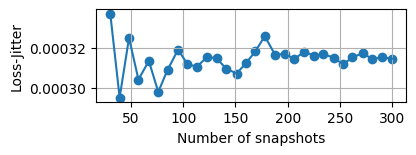

In [5]:
keys, values = database.load_result()
jitter_values = [loss_anaylzer.get_loss_jitter(v) for v in values]

plt.plot(keys, jitter_values)
plt.scatter(keys, jitter_values)
plt.xlabel("Number of snapshots")
plt.ylabel("Loss-Jitter")

plt.grid()
plt.gcf().set_size_inches(4, 1.2)
plt.savefig("../plots/analysis_loss_nsnapshots.svg")
plt.show()